# Sentence Representations

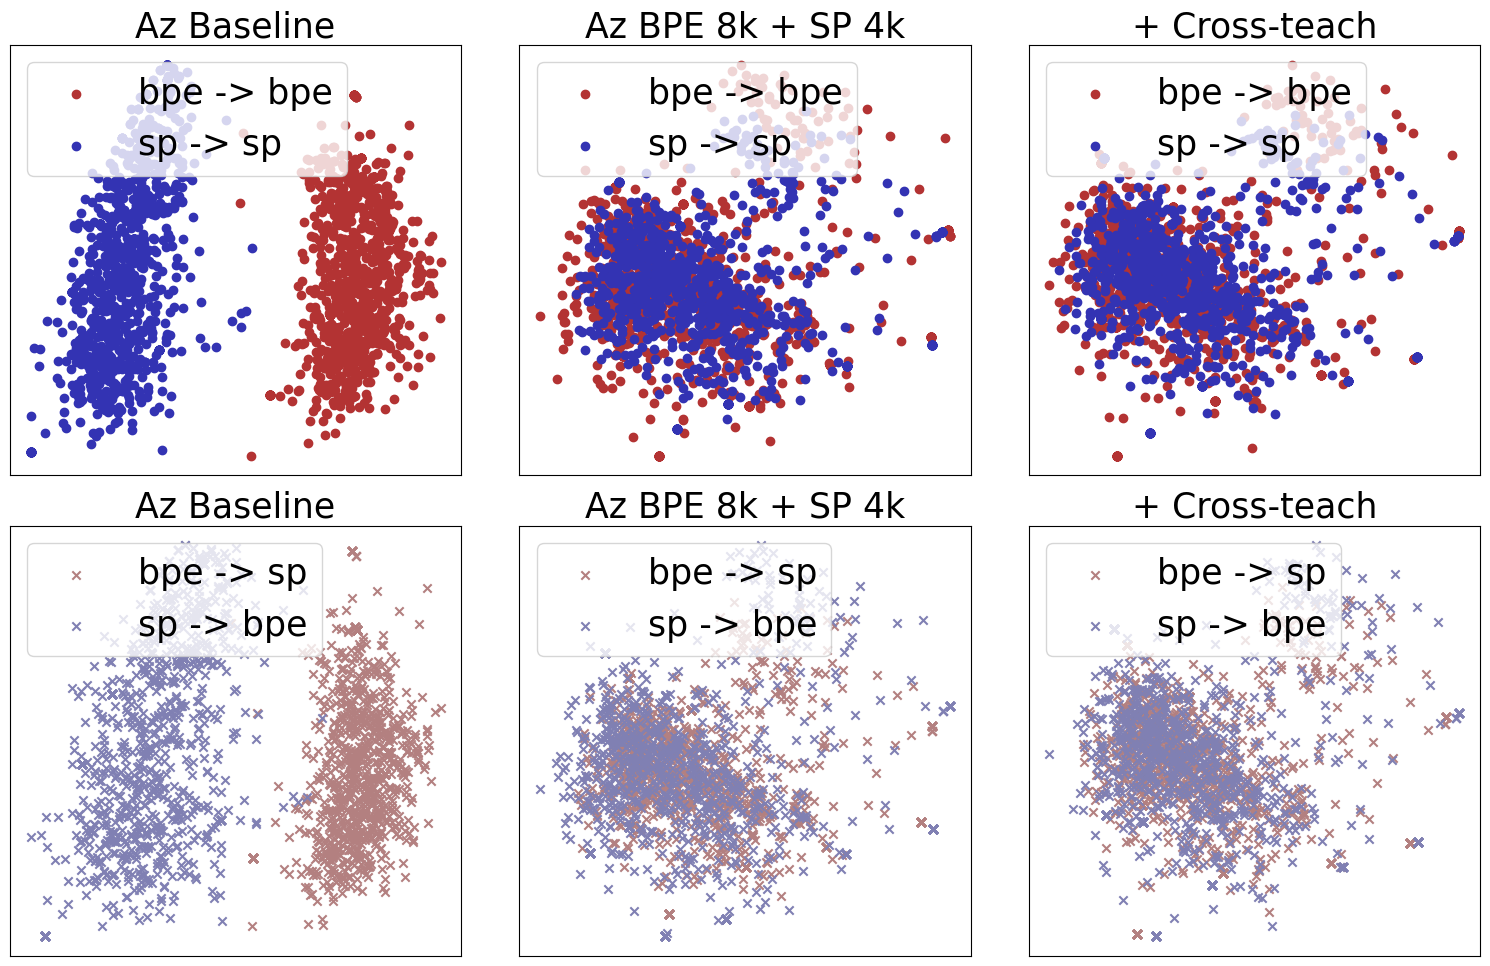

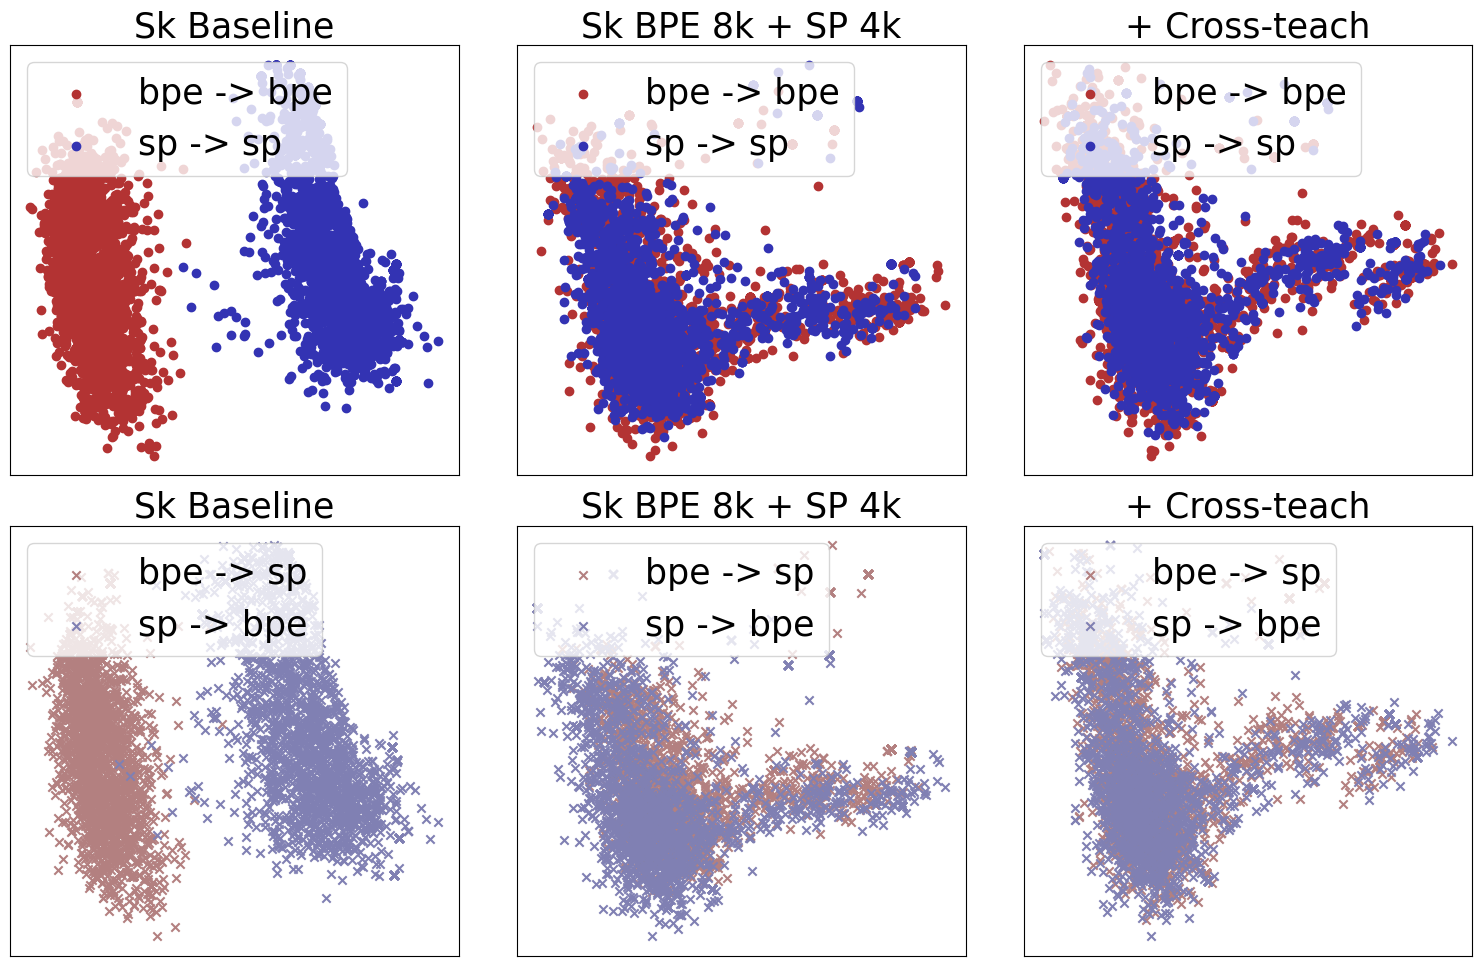

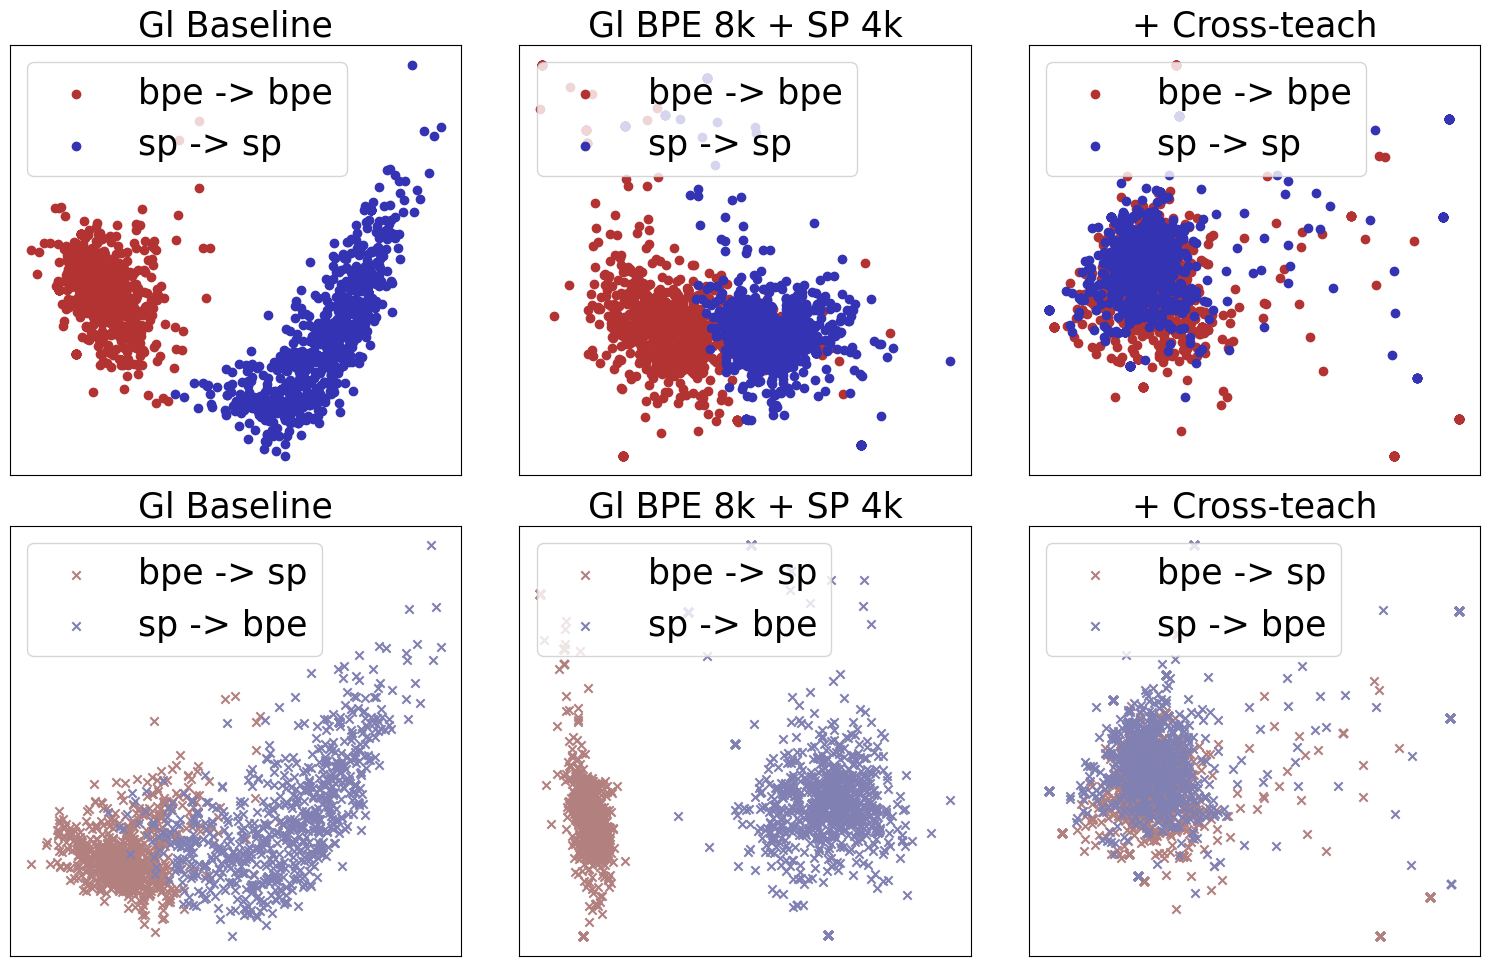

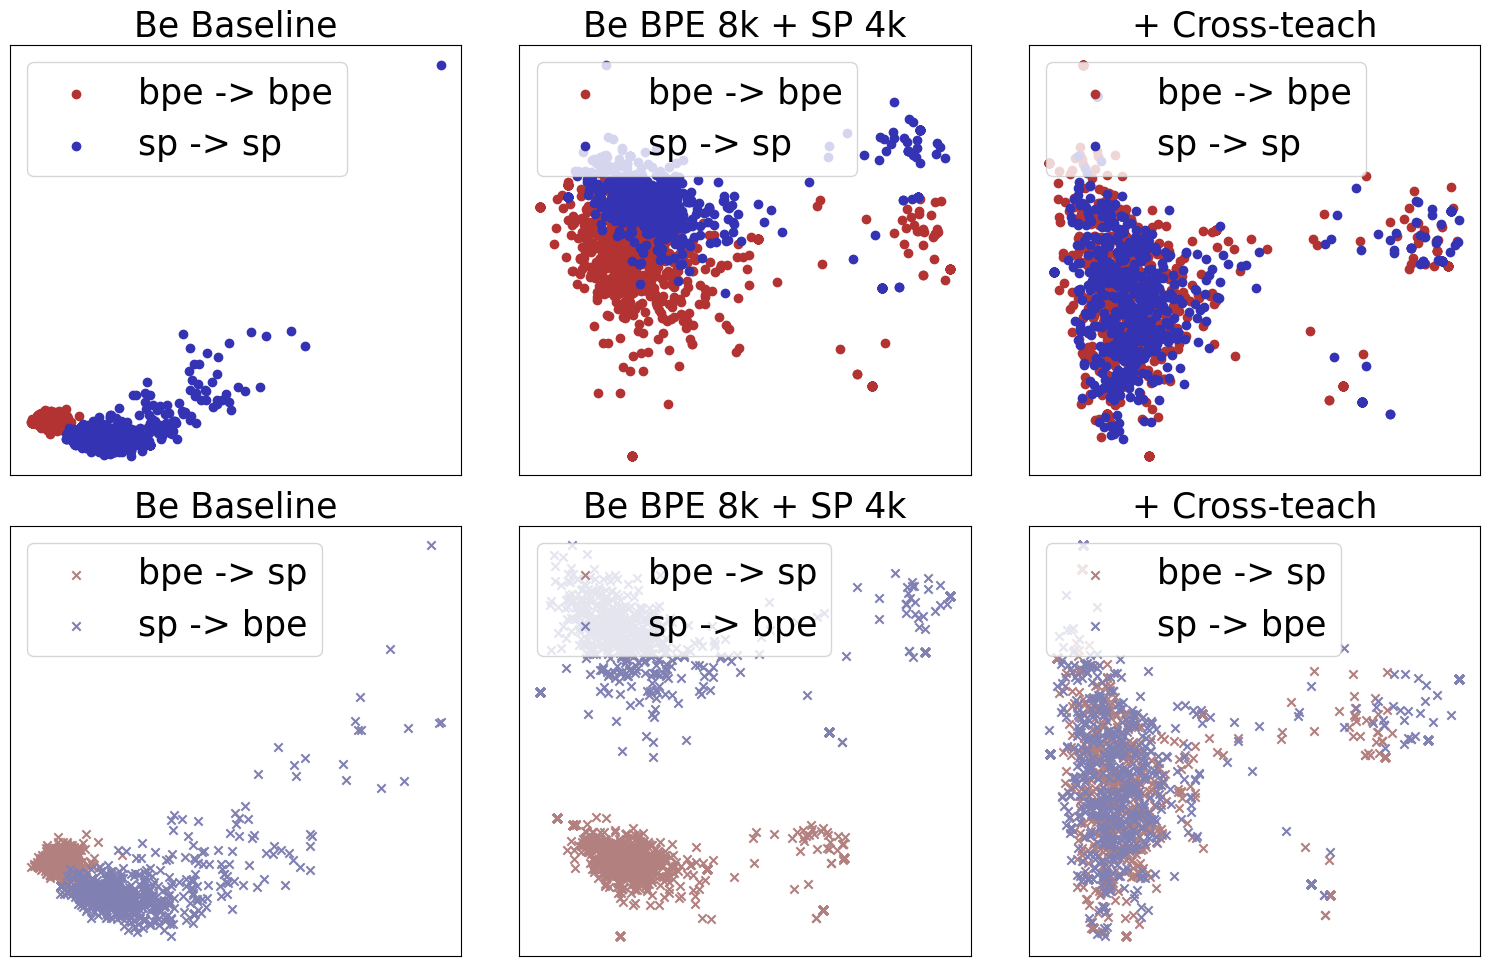

In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

for hrl, lrl in [("tr","az"),("cs","sk"),("pt-br","gl"),("ru","be")]:
    npz     = np.load(f"reprs/{hrl}+{lrl}.npz", allow_pickle=True)
    data    = npz["data"].item()

    plt.figure(figsize=(15,10))
    for i, model in enumerate(["base", "uni", "coteach"]):
        X_uni_spb = [embed for embed, _, _ in data[lrl][4000][f"{model}.checkpoint_best.pt.spb2spb"]]
        X_uni_bpe = [embed for embed, _, _ in data[lrl][8000][f"{model}.checkpoint_best.pt.bpes2bpes"]]

        X_cross_spb = [embed for embed, _, _ in data[lrl][4000][f"{model}.checkpoint_best.pt.spb2bpes"]]
        X_cross_bpe = [embed for embed, _, _ in data[lrl][8000][f"{model}.checkpoint_best.pt.bpes2spb"]]

        X = X_uni_bpe + X_uni_spb + X_cross_bpe + X_cross_spb
        X = PCA(n_components=2).fit_transform(X)

        plt.subplot(2,3,i+1)
        plt.scatter(
            X[:len(X_uni_bpe),0],
            X[:len(X_uni_bpe),1], 
            marker='o', 
            color=(0.7,0.2,0.2), 
            label='bpe -> bpe'
        )
        plt.scatter(
            X[len(X_uni_bpe):len(X_uni_bpe)+len(X_uni_spb),0],
            X[len(X_uni_bpe):len(X_uni_bpe)+len(X_uni_spb),1], 
            marker='o', 
            color=(0.2,0.2, 0.7), 
            label='sp -> sp'
        )
        plt.legend(loc=2, fontsize=25)
        plt.tight_layout()
        plt.title([
            f"{lrl.capitalize()} Baseline", 
            f"{lrl.capitalize()} BPE 8k + SP 4k", 
            f"+ Cross-teach"
        ][i], fontsize=25)
        plt.tick_params(
            axis="both", 
            which="both", 
            bottom=False, 
            top=False, 
            left=False, 
            right=False, 
            labelbottom=False, 
            labelleft=False
        )

        plt.subplot(2,3,i+4)
        plt.scatter(
            X[len(X_uni_bpe)+len(X_uni_spb):len(X_uni_bpe)+len(X_uni_spb)+len(X_cross_bpe),0],
            X[len(X_uni_bpe)+len(X_uni_spb):len(X_uni_bpe)+len(X_uni_spb)+len(X_cross_bpe),1], 
            marker='x', 
            color=(0.7,0.5,0.5), 
            label='bpe -> sp'
        )
        plt.scatter(
            X[len(X_uni_bpe)+len(X_uni_spb)+len(X_cross_bpe):,0],
            X[len(X_uni_bpe)+len(X_uni_spb)+len(X_cross_bpe):,1], 
            marker='x', 
            color=(0.5,0.5, 0.7), 
            label='sp -> bpe'
        )
        plt.legend(loc=2, fontsize=25)
        plt.tight_layout()
        plt.title([
            f"{lrl.capitalize()} Baseline", 
            f"{lrl.capitalize()} BPE 8k + SP 4k", 
            f"+ Cross-teach"
        ][i], fontsize=25)
        plt.tick_params(
            axis="both", 
            which="both", 
            bottom=False, 
            top=False, 
            left=False, 
            right=False, 
            labelbottom=False, 
            labelleft=False
        )
    plt.show()